In [ ]:
pip install mealpy mealpy==3.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 86.0 MB/s eta 0:00:00


In [ ]:
import json
import numpy as np
import time
import matplotlib.pyplot as plt

# Load the task-VM dataset
with open("data_10000_10.json") as f:
    data = json.load(f)

# Slice the task list to only use the first 1000 tasks
#Change the task as required from here.
data["task"] = data["task"][:1000]

# Confirm correct slicing
print(f" Loaded {len(data['task'])} tasks and {data['vmcount'][0]} VMs.")


 Loaded 1000 tasks and 10 VMs.


In [ ]:
def Fun1(solution):
  # Initialize a list to store the total load for each VM
  list1 = [0] * data['vmcount'][0]
  val = 0.0
  for i in range(solution.size):
    # Add small Gaussian noise before rounding to reduce ties
    solution[i] = round(solution[i] + np.random.normal(0, 0.1)) #small noise before rounding off

    # Assign task load to the corresponding VM based on the rounded value
    if(round(solution[i])!=0.0):
      list1[int(abs(round(solution[i],0)))-1]=list1[int(abs(round(solution[i],0)))-1] + data['task'][0]/data['VM'][int(abs(round(solution[i],0)))-1]
    else:
      list1[int(abs(round(solution[i])))]=list1[int(abs(round(solution[i],0)))] + data['task'][0]/data['VM'][int(abs(round(solution[i])))]

  # Print the maximum load across all VMs
  print(max(list1))
   # Calculate and print average VM utilisation in percentage
  l=max(list1)
  uitli=[x/l for x in list1]
  print(np.mean(uitli)*100)


In [ ]:
def Fun(solution):
  # Initialize a list to store total load on each VM
  list1 = [0] * data['vmcount'][0]
  val = 0.0
  #print(solution)
  #print(int(round(solution[0])))
  for i in range(solution.size):
    #solution[i]=round(solution[i])
    # Add small Gaussian noise before rounding to reduce ties
    solution[i] = round(solution[i] + np.random.normal(0, 0.1)) #small noise before rounding off
    # Assign task load to the corresponding VM index
    if(round(solution[i])!=0.0):
      list1[int(round(solution[i]))-1]=list1[int(round(solution[i]))-1] + data['task'][0]/data['VM'][int(round(solution[i]))-1]
    else:
      list1[int(round(solution[i]))]=list1[int(round(solution[i]))] + data['task'][0]/data['VM'][int(round(solution[i]))]
  #print(solution)
  # Return the maximum load among all VMs
  return max(list1)

start_time = time.time()

INFO:mealpy.swarm_based.PSO.OriginalPSO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 1280.0, Global best: 1280.0, Runtime: 0.81343 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 1280.0, Global best: 1280.0, Runtime: 0.88858 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 1280.0, Global best: 1280.0, Runtime: 0.74747 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 1280.0, Global best: 1280.0, Runtime: 0.73808 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 1232.0, Global best: 1232.0, Runtime: 0.82517 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 1200.0, Global best: 1200.0, Runtime: 0.80107 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 7, Current best: 976.0, Global best: 976.0, Runtime: 

914.2857142857113
71.42500000000011


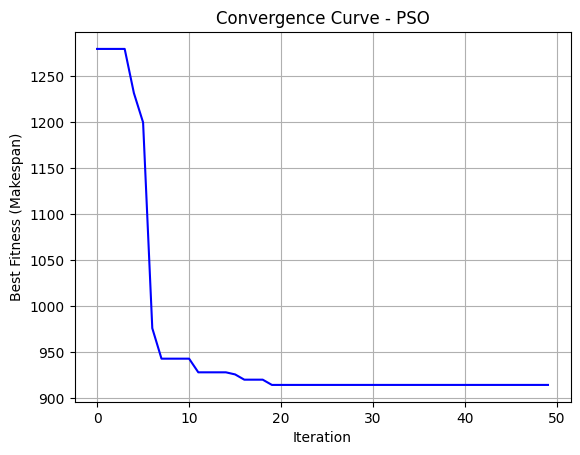

In [ ]:
from mealpy.swarm_based import PSO
from mealpy.utils.problem import FloatVar

# Define optimization problem
problem_dict = {
    "obj_func": Fun,  # Objective function to minimize
    "bounds": FloatVar(
        lb=[0] * len(data["task"]),     # Lower bound (0 for all tasks)
        ub=[data["vmcount"][0] - 1] * len(data["task"]),  # Upper bound (VM count - 1)
        name="delta"    # Variable name
    ),
    "minmax": "min" # Minimization problem
}

# Initialize standard PSO optimizer with matching parameters to hybrid for fair comparison
optimizer = PSO.OriginalPSO(
    epoch=50,      # Number of iterations
    pop_size=100,  # Population size
    w=0.5,         # Inertia weight
    c1=1.5,        # Cognitive coefficient
    c2=1.5         # Social coefficient
)

# Run optimization
start_time = time.time()
g_best = optimizer.solve(problem_dict)
end_time = time.time()

# Extract best solution and fitness score
best_solution = np.array(g_best.solution)
best_score = g_best.target.fitness

# Evaluate and display final solution
Fun1(best_solution)

# Plot the convergence curve
plt.plot(optimizer.history.list_global_best_fit, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Best Fitness (Makespan)")
plt.title("Convergence Curve - PSO")
plt.grid(True)
plt.show()


In [ ]:
# Store experiment results in a dictionary
result = {
    "algorithm": "PSO",                              # Algorithm name
    "dataset": "data_10000_10.json",                 # Dataset used
    "best_fitness": float(best_score),               # Best fitness score (makespan)
    "execution_time": round(end_time - start_time, 4), # Execution time in seconds
    "num_particles": 100,                            # Number of particles in population
    "num_iterations": 50                             # Number of iterations
}

# Try loading existing results from file
try:
    with open("output_final_comparison.json", "r") as f:
        all_results = json.load(f)
except FileNotFoundError:
    all_results = []  # Create empty list if file does not exist

# Append the current run result
all_results.append(result)

# Save updated results back to the JSON file
with open("output_final_comparison.json", "w") as f:
    json.dump(all_results, f, indent=4)

print("Result saved to output_final_comparison.json")  # Confirmation message


In [ ]:

def optimize(json_file,algo,size1,vmcount1):
  problem_dict = {
    "bounds": FloatVar(lb=[0 for i in range(size1)] , ub=[vmcount1-1 for i in range(size1)], name="delta"),
    "minmax": "min",
    "obj_func": Fun
  }
  if(algo=="BBO"):
    model = BBO.OriginalBBO(epoch=10, pop_size=30, p_m=0.01, n_elites=2)
  if(algo=="PSO"):
    model = PSO.OriginalPSO(epoch=100, pop_size=50, c1=2.05, c2=2.5, w=0.4)
  if(algo=="PSO2"):
    model = PSO.LDW_PSO(epoch=100, pop_size=50, c1=2.05, c2=2.5, w_min=0.4, w_max=0.9)
  if(algo=="PSO3"):
    model = PSO.AIW_PSO(epoch=100, pop_size=50, c1=2.05, c2=2.5, alpha=0.4)
  if(algo=="PSO4"):
    model = PSO.P_PSO(epoch=100, pop_size=50)
  if(algo=="PSO5"):
    model = PSO.HPSO_TVAC(epoch=100, pop_size=50, ci=0.5, cf=0.1)
  if(algo=="PSO6"):
    model = PSO.C_PSO(epoch=100, pop_size=50, c1=2.05, c2=2.05, w_min=0.4, w_max=0.9)
  if(algo=="PSO7"):
    model = PSO.CL_PSO(epoch=100, pop_size=50, c_local=1.2, w_min=0.4, w_max=0.9, max_flag=7)
  if(algo=="GA"):
    model = GA.BaseGA(epoch=100, pop_size=50, pc=0.9, pm=0.05, selection="tournament", k_way=0.4, crossover="multi_points", mutation="swap")
  if(algo=="GA1"):
    model = GA.SingleGA(epoch=100, pop_size=50, pc=0.9, pm=0.8, selection="tournament", k_way=0.4, crossover="multi_points", mutation="swap")
  if(algo=="GA2"):
    model = GA.MultiGA(epoch=100, pop_size=50, pc=0.9, pm=0.8, selection="tournament", k_way=0.4, crossover="multi_points", mutation="swap")
  if(algo=="GA3"):
    model = GA.EliteSingleGA(epoch=100, pop_size=50, pc=0.95, pm=0.8, selection="roulette", crossover="uniform", mutation="swap", k_way=0.2, elite_best=0.1,
  te_worst=0.3, strategy=0)
  if(algo=="GA4"):
    model = GA.EliteMultiGA(epoch=100, pop_size=50, pc=0.95, pm=0.8, selection="roulette", crossover="uniform", mutation="swap", k_way=0.2, elite_best=0.1,elite_worst=0.3, strategy=0)
  if(algo=="ABC"):
    model = ABC.OriginalABC(epoch=1000, pop_size=50, n_limits=50)
  if(algo=="ACOR"):
    model = ACOR.OriginalACOR(epoch=1000, pop_size=50, sample_count=25, intent_factor=0.5, zeta=1.0)
  if(algo=="AGTO"):
    model = AGTO.OriginalAGTO(epoch=1000, pop_size=50, p1=0.03, p2=0.8, beta=3.0)
  if(algo=="AGTO1"):
    model = AGTO.MGTO(epoch=1000, pop_size=50, pp=0.03)
  if(algo=="ALO"):
    model = ALO.OriginalALO(epoch=100, pop_size=50)
  if(algo=="ALO1"):
    model = ALO.DevALO(epoch=100, pop_size=50)
  if(algo=="AO"):
    model = AO.OriginalAO(epoch=100, pop_size=50)
  if(algo=="ARO"):
    model = ARO.OriginalARO(epoch=100, pop_size=50)
  if(algo=="ARO1"):
    model = ARO.LARO(epoch=100, pop_size=50)
  if(algo=="ARO1"):
    model = ARO.IARO(epoch=100, pop_size=50)
  if(algo=="AVOA"):
    model = AVOA.OriginalAVOA(epoch=100, pop_size=50, p1=0.6, p2=0.4, p3=0.6, alpha=0.8, gama=2.5)
  if(algo=="BA"):
    model = BA.OriginalBA(epoch=100, pop_size=50, loudness=0.8, pulse_rate=0.95, pf_min=0.1, pf_max=10.0)
  if(algo=="BA1"):
    model = BA.AdaptiveBA(epoch=100, pop_size=50, loudness_min=1.0, loudness_max=2.0, pr_min=-2.5, pr_max=0.85, pf_min=0.1, pf_max=10.)
  if(algo=="BA2"):
    model = BA.DevBA(epoch=100, pop_size=50, pulse_rate=0.95, pf_min=0., pf_max=10.)
  if(algo=="BBO"):
    model = BBOA.OriginalBBOA(epoch=100, pop_size=50)
  if(algo=="BWO"):
    model = BMO.OriginalBMO(epoch=100, pop_size=50, pl=4)
  if(algo=="EOA"):
    model = EOA.OriginalEOA(epoch=100, pop_size=50, p_c=0.9, p_m=0.01, n_best=2, alpha=0.98, beta=0.9, gama=0.9)
  if(algo=="IWO"):
    model = IWO.OriginalIWO(epoch=100, pop_size=50, seed_min=3, seed_max=9, exponent=3, sigma_start=0.6, sigma_end=0.01)
  if(algo=="SBO"):
    model = SBO.DevSBO(epoch=100, pop_size=50, alpha=0.9, p_m=0.05, psw=0.02)
  if(algo=="SBO1"):
    model = SBO.OriginalSBO(epoch=100, pop_size=50, alpha=0.9, p_m=0.05, psw=0.02)
  if(algo=="SMA"):
    model = SMA.OriginalSMA(epoch=100, pop_size=50, p_t=0.03)
  if(algo=="SMA1"):
    model = SMA.DevSMA(epoch=100, pop_size=50, p_t=0.03)
  if(algo=="SOA"):
    model = SOA.OriginalSOA(epoch=100, pop_size=50, fc=2)
  if(algo=="SOA"):
    model = SOA.DevSOA(epoch=100, pop_size=50, fc=2)
  if(algo=="SOS"):
    model = SOS.OriginalSOS(epoch=100, pop_size=50)
  if(algo=="TPO"):
    model = TPO.DevTPO(epoch=100, pop_size=50, alpha=0.3, beta=50., theta=0.9)
  if(algo=="TSA"):
    model = TSA.OriginalTSA(epoch=100, pop_size=50)
  if(algo=="VCS"):
    model = VCS.OriginalVCS(epoch=100, pop_size=50, lamda=0.5, sigma=0.3)
  if(algo=="VCS"):
    model = VCS.DevVCS(epoch=100, pop_size=50, lamda=0.5, sigma=0.3)
  if(algo=="WHO"):
    model = WHO.OriginalWHO(epoch=100, pop_size=50, n_explore_step=3, n_exploit_step=3, eta=0.15, p_hi=0.9, local_alpha=0.9, local_beta=0.3, global_alpha=0.2,global_beta=0.8, delta_w=2.0, delta_c=2.0)
  if(algo=="AOA"):
    model = AOA.OriginalAOA(epoch=100, pop_size=50, alpha=5, miu=0.5, moa_min=0.2, moa_max=0.9)
  if(algo=="CEM"):
    model = CEM.OriginalCEM(epoch=100, pop_size=50, n_best=20, alpha=0.7)
  if(algo=="CGO"):
    model = CGO.OriginalCGO(epoch=100, pop_size=50)
  if(algo=="CircleSA"):
    model = CircleSA.OriginalCircleSA(epoch=100, pop_size=50, c_factor=0.8)
  if(algo=="GBO"):
    model = GBO.OriginalGBO(epoch=100, pop_size=50, pr=0.5, beta_min=0.2, beta_max=1.2)
  if(algo=="HC"):
    model = HC.OriginalHC(epoch=100, pop_size=50, neighbour_size=50)
  if(algo=="HC1"):
    model = HC.SwarmHC(epoch=100, pop_size=50, neighbour_size=10)
  if(algo=="INFO"):
    model = INFO.OriginalINFO(epoch=100, pop_size=50)
  if(algo=="PSS"):
    model = PSS.OriginalPSS(epoch=100, pop_size=50, acceptance_rate=0.8, sampling_method="LHS")
  if(algo=="RUN"):
    model = RUN.OriginalRUN(epoch=100, pop_size=50)
  if(algo=="SCA"):
    model = SCA.OriginalSCA(epoch=100, pop_size=50)
  if(algo=="SCA1"):
    model = SCA2.DevSCA(epoch=100, pop_size=50)
  if(algo=="SCA3"):
    model = SCA.QleSCA(epoch=100, pop_size=50, alpha=0.1, gama=0.9)
  if(algo=="SHIO"):
    model = SHIO.OriginalSHIO(epoch=100, pop_size=50)
  if(algo=="TS"):
    model = TS.OriginalTS(epoch=100, pop_size=50, tabu_size=5, neighbour_size=20, perturbation_scale=0.05)
  if(algo=="HS"):
    model = HS.OriginalHS(epoch=100, pop_size=50, c_r=0.95, pa_r=0.05)
  if(algo=="HS1"):
    model = HS.DevHS(epoch=100, pop_size=50, c_r=0.95, pa_r=0.05)
  if(algo=="AEO"):
    model = AEO.OriginalAEO(epoch=100, pop_size=50)
  if(algo=="AEO1"):
    model = AEO.EnhancedAEO(epoch=100, pop_size=50)
  if(algo=="AEO2"):
    model = AEO.ModifiedAEO(epoch=100, pop_size=50)
  if(algo=="AEO3"):
    model = AEO.ImprovedAEO(epoch=100, pop_size=50)
  if(algo=="AEO4"):
    model = AEO.AugmentedAEO(epoch=100, pop_size=50)
  if(algo=="GCO"):
    model = GCO.OriginalGCO(epoch=100, pop_size=50, cr=0.7, wf=1.25)
  if(algo=="GCO1"):
    model = GCO.DevGCO(epoch=100, pop_size=50, cr=0.7, wf=1.25)
  if(algo=="WCA"):
    model = WCA.OriginalWCA(epoch=100, pop_size=50, nsr=4, wc=2.0, dmax=1e-6)
  if(algo=="CRO"):
    model = CRO.OriginalCRO(epoch=100, pop_size=50, po=0.4, Fb=0.9, Fa=0.1, Fd=0.1, Pd=0.5, GCR=0.1, gamma_min=0.02, gamma_max=0.2, n_trials=5)
  if(algo=="CRO1"):
    model = CRO.OCRO(epoch=100, pop_size=50, po=0.4, Fb=0.9, Fa=0.1, Fd=0.1, Pd=0.5, GCR=0.1, gamma_min=0.02, gamma_max=0.2, n_trials=5, restart_count=50)
  if(algo=="DE"):
    model = DE.OriginalDE(epoch=100, pop_size=50, wf=0.7, cr=0.9, strategy=0)
  if(algo=="DE1"):
    model = DE.JADE(epoch=100, pop_size=50, miu_f=0.5, miu_cr=0.5, pt=0.1, ap=0.1)
  if(algo=="DE2"):
    model = DE.SADE(epoch=100, pop_size=50)
  if(algo=="DE3"):
    model = DE.SAP_DE(epoch=100, pop_size=50, branch="ABS")
  if(algo=="EP"):
    model = EP.OriginalEP(epoch=100, pop_size=50, bout_size=0.05)
  if(algo=="EP1"):
    model = EP.LevyEP(epoch=100, pop_size=50, bout_size=0.05)
  if(algo=="ES"):
    model = ES.OriginalES(epoch=100, pop_size=50, lamda=0.75)
  if(algo=="ES1"):
    model = ES.LevyES(epoch=100, pop_size=50, lamda=0.75)
  if(algo=="ES2"):
    model = ES.CMA_ES(epoch=100, pop_size=50)
  if(algo=="ES3"):
    model = ES.Simple_CMA_ES(epoch=100, pop_size=50)
  if(algo=="FPA"):
    model = FPA.OriginalFPA(epoch=100, pop_size=50, p_s=0.8, levy_multiplier=0.2)
  if(algo=="MA"):
    model = MA.OriginalMA(epoch=100, pop_size=50, pc=0.85, pm=0.15, p_local=0.5, max_local_gens=10, bits_per_param=4)
  if(algo=="SHADE"):
    model = SHADE.OriginalSHADE(epoch=100, pop_size=50, miu_f=0.5, miu_cr=0.5)
  if(algo=="SHADE2"):
    model = SHADE.L_SHADE(epoch=100, pop_size=50, miu_f=0.5, miu_cr=0.5)
  if(algo=="BRO"):
    model = BRO.OriginalBRO(epoch=100, pop_size=50, threshold=3)
  if(algo=="BRO1"):
    model = BRO.DevBRO(epoch=100, pop_size=50, threshold=3)
  if(algo=="BSO"):
    model = BSO.OriginalBSO(epoch=100, pop_size=50, m_clusters=5, p1=0.2, p2=0.8, p3=0.4, p4=0.5, slope=20)
  if(algo=="BSO1"):
    model = BSO.ImprovedBSO(epoch=100, pop_size=50, m_clusters=5, p1=0.25, p2=0.5, p3=0.75, p4=0.6)
  if(algo=="CA"):
    model = CA.OriginalCA(epoch=100, pop_size=50, accepted_rate=0.15)
  if(algo=="CHIO"):
    model = CHIO.OriginalCHIO(epoch=100, pop_size=50, brr=0.15, max_age=10)
  if(algo=="CHIO1"):
    model = CHIO.DevCHIO(epoch=100, pop_size=50, brr=0.15, max_age=10)
  if(algo=="FBIO"):
    model = FBIO.OriginalFBIO(epoch=100, pop_size=50)
  if(algo=="FBIO1"):
    model = FBIO.DevFBIO(epoch=100, pop_size=50)
  if(algo=="GSKA"):
    model = GSKA.OriginalGSKA(epoch=100, pop_size=50, pb=0.1, kf=0.5, kr=0.9, kg=5)
  if(algo=="GSKA1"):
    model = GSKA.DevGSKA(epoch=100, pop_size=50, pb=0.1, kr=0.9)
  if(algo=="HBO"):
    model = HBO.OriginalHBO(epoch=100, pop_size=50, degree=3)
  if(algo=="HCO"):
    model = HCO.OriginalHCO(epoch=100, pop_size=50, wfp=0.65, wfv=0.05, c1=1.4, c2=1.4)
  if(algo=="ICA"):
    model = ICA.OriginalICA(epoch=100, pop_size=50, empire_count=5, assimilation_coeff=1.5, revolution_prob=0.05, revolution_rate=0.1, revolution_step_size=0.1,zeta=0.1)
  if(algo=="LCO"):
    model = LCO.OriginalLCO(epoch=100, pop_size=50, r1=2.35)
  if(algo=="LCO1"):
    model = LCO.ImprovedLCO(epoch=100, pop_size=50)
  if(algo=="LCO2"):
    model = LCO.DevLCO(epoch=100, pop_size=50, r1=2.35)
  if(algo=="WarSO"):
    model = WarSO.OriginalWarSO(epoch=100, pop_size=50, rr=0.1)
  if(algo=="TOA"):
    model = TOA.OriginalTOA(epoch=100, pop_size=50)
  if(algo=="TLO"):
    model = TLO.OriginalTLO(epoch=100, pop_size=50)
  if(algo=="TLO1"):
    model = TLO.ImprovedTLO(epoch=100, pop_size=50, n_teachers=5)
  if(algo=="TLO2"):
    model = TLO.DevTLO(epoch=100, pop_size=50)
  if(algo=="SSDO"):
    model = SSDO.OriginalSSDO(epoch=100, pop_size=50)
  if(algo=="SPBO"):
    model = SPBO.OriginalSPBO(epoch=100, pop_size=50)
  if(algo=="SPBO1"):
    model = SPBO.DevSPBO(epoch=100, pop_size=50)
  if(algo=="SARO"):
    model = SARO.OriginalSARO(epoch=100, pop_size=50, se=0.5, mu=50)
  if(algo=="SARO1"):
    model = SARO.DevSARO(epoch=100, pop_size=50, se=0.5, mu=50)
  if(algo=="QSA"):
    model = QSA.OriginalQSA(epoch=100, pop_size=50)
  if(algo=="QSA1"):
    model = QSA.DevQSA(epoch=100, pop_size=50)
  if(algo=="QSA2"):
    model = QSA.OppoQSA(epoch=100, pop_size=50)
  if(algo=="QSA3"):
    model = QSA.LevyQSA(epoch=100, pop_size=50)
  if(algo=="QSA4"):
    model = QSA.ImprovedQSA(epoch=100, pop_size=50)


  if(algo=="ArchOA"):
    model = ArchOA.OriginalArchOA(epoch=100, pop_size=50, c1=2, c2=5, c3=2, c4=0.5, acc_max=0.9, acc_min=0.1)
  if(algo=="ASO"):
    model = ASO.OriginalASO(epoch=100, pop_size=50, alpha=50, beta=0.2)
  if(algo=="CDO"):
    model = CDO.OriginalCDO(epoch=100, pop_size=50)
  if(algo=="EFO"):
    model = EFO.OriginalEFO(epoch=100, pop_size=50, r_rate=0.3, ps_rate=0.85, p_field=0.1, n_field=0.45)
  if(algo=="EFO1"):
    model = EFO.DevEFO(epoch=100, pop_size=50, r_rate=0.3, ps_rate=0.85, p_field=0.1, n_field=0.45)
  if(algo=="EO"):
    model = EO.OriginalEO(epoch=100, pop_size=50)
  if(algo=="EO1"):
    model = EO.AdaptiveEO(epoch=100, pop_size=50)
  if(algo=="EO2"):
    model = EO.ModifiedEO(epoch=100, pop_size=50)
  if(algo=="EVO"):
    model = EVO.OriginalEVO(epoch=100, pop_size=50)
  if(algo=="FLA"):
    model = FLA.OriginalFLA(epoch=100, pop_size=50, C1=0.5, C2=2.0, C3=0.1, C4=0.2, C5=2.0, DD=0.01)
  if(algo=="HGSO"):
    model = HGSO.OriginalHGSO(epoch=100, pop_size=50, n_clusters=3)
  if(algo=="MVO"):
    model = MVO.OriginalMVO(epoch=100, pop_size=50, wep_min=0.2, wep_max=1.0)
  if(algo=="MVO1"):
    model = MVO.DevMVO(epoch=100, pop_size=50, wep_min=0.2, wep_max=1.0)


  if(algo=="NRO"):
    model = NRO.OriginalNRO(epoch=100, pop_size=50)
  if(algo=="RIME"):
    model = RIME.OriginalRIME(epoch=100, pop_size=50, sr=5.0)
  if(algo=="SA"):
    model = SA.OriginalSA(epoch=100, pop_size=50, temp_init=100, step_size=0.1)
  if(algo=="SA1"):
    model = SA.GaussianSA(epoch=100, pop_size=50, temp_init=100, cooling_rate=0.99, scale=0.1)
  if(algo=="SA2"):
    model = SA.SwarmSA(epoch=100, pop_size=50, max_sub_iter=5, t0=1000, t1=1, move_count=5, mutation_rate=0.1, mutation_step_size=0.1,
                        mutation_step_size_damp=0.99)
  if(algo=="WDO"):
    model = WDO.OriginalWDO(epoch=100, pop_size=50, RT=3, g_c=0.2, alp=0.4, c_e=0.4, max_v=0.3)
  if(algo=="TWO"):
    model = TWO.OriginalTWO(epoch=100, pop_size=50)
  if(algo=="TWO1"):
    model = TWO.EnhancedTWO(epoch=100, pop_size=50)
  if(algo=="TWO2"):
    model = TWO.OppoTWO(epoch=100, pop_size=50)
  if(algo=="TWO3"):
    model = TWO.LevyTWO(epoch=100, pop_size=50)
  if(algo=="ABC"):
    model = ABC.OriginalABC(epoch=100, pop_size=50, n_limits=50)
  if(algo=="ACOR"):
    model = ACOR.OriginalACOR(epoch=100, pop_size=50, sample_count=25, intent_factor=0.5, zeta=1.0)
  if(algo=="AGTO"):
    model = AGTO.OriginalAGTO(epoch=100, pop_size=50, p1=0.03, p2=0.8, beta=3.0)
  if(algo=="AGTO1"):
    model = AGTO.MGTO(epoch=100, pop_size=50, pp=0.03)
  if(algo=="BeesA"):
    model = BeesA.OriginalBeesA(epoch=100, pop_size=50, selected_site_ratio=0.5, elite_site_ratio=0.4, selected_site_bee_ratio=0.1, elite_site_bee_ratio=2.0,dance_radius=0.1, dance_reduction=0.99)
  if(algo=="BeesA1"):
    model = BeesA.CleverBookBeesA(epoch=100, pop_size=50, n_elites=16, n_others=4, patch_size=5.0, patch_reduction=0.985, n_sites=3, n_elite_sites=1)
  if(algo=="BeesA2"):
    model = BeesA.ProbBeesA(epoch=100, pop_size=50, recruited_bee_ratio=0.1, dance_radius=0.1, dance_reduction=0.99)
  if(algo=="BES"):
    model = BES.OriginalBES(epoch=100, pop_size=50, a_factor=10, R_factor=1.5, alpha=2.0, c1=2.0, c2=2.0)
  if(algo=="BFO"):
    model = BFO.OriginalBFO(epoch=100, pop_size=50, Ci=0.01, Ped=0.25, Nc=5, Ns=4, d_attract=0.1, w_attract=0.2, h_repels=0.1, w_repels=10)
  if(algo=="BFO1"):
    model = BFO.ABFO(epoch=100, pop_size=50, C_s=0.1, C_e=0.001, Ped=0.01, Ns=4, N_adapt=2, N_split=40)
  if(algo=="ZOA"):
    model = ZOA.OriginalZOA(epoch=100, pop_size=50)
  if(algo=="WOA"):
    model = WOA.OriginalWOA(epoch=100, pop_size=50)
  if(algo=="WOA"):
    model = WOA.HI_WOA(epoch=100, pop_size=50, feedback_max=10)
  if(algo=="WaOA"):
    model = WaOA.OriginalWaOA(epoch=100, pop_size=50)
  if(algo=="TSO"):
    model = TSO.OriginalTSO(epoch=100, pop_size=50)
  if(algo=="TDO"):
    model = TDO.OriginalTDO(epoch=100, pop_size=50)
  if(algo=="STO"):
    model = STO.OriginalSTO(epoch=100, pop_size=50)


  if(algo=="SSpiderO"):
    model = SSpiderO.OriginalSSpiderO(epoch=100, pop_size=50, fp_min=0.65, fp_max=0.9)
  if(algo=="SSpiderA"):
    model = SSpiderA.OriginalSSpiderA(epoch=100, pop_size=50, r_a=1.0, p_c=0.7, p_m=0.1)
  if(algo=="SSO"):
    model = SSO.OriginalSSO(epoch=100, pop_size=50)
  if(algo=="SSA1"):
    model = SSA.OriginalSSA(epoch=100, pop_size=50, ST=0.8, PD=0.2, SD=0.1)
  if(algo=="SSA"):
    model = SSA.DevSSA(epoch=100, pop_size=50, ST=0.8, PD=0.2, SD=0.1)
  if(algo=="SRSR"):
    model = SRSR.OriginalSRSR(epoch=100, pop_size=50)
  if(algo=="SLO"):
    model = SLO.OriginalSLO(epoch=100, pop_size=50)
  if(algo=="SLO2"):
    model = SLO.ModifiedSLO(epoch=100, pop_size=50)
  if(algo=="SLO1"):
    model = SLO.ImprovedSLO(epoch=100, pop_size=50, c1=1.2, c2=1.5)
  if(algo=="SHO"):
    model = SHO.OriginalSHO(epoch=100, pop_size=50, h_factor=5.0, n_trials=10)
  if(algo=="SFO1"):
    model = SFO.OriginalSFO(epoch=100, pop_size=50, pp=0.1, AP=4.0, epsilon=0.0001)
  if(algo=="SFO"):
    model = SFO.ImprovedSFO(epoch=100, pop_size=50, pp=0.1)
  if(algo=="ServalOA"):
    model = ServalOA.OriginalServalOA(epoch=100, pop_size=50)
  if(algo=="SeaHO"):
    model = SeaHO.OriginalSeaHO(epoch=100, pop_size=50)
  if(algo=="SCSO"):
    model = SCSO.OriginalSCSO(epoch=100, pop_size=50)
  if(algo=="POA"):
    model = POA.OriginalPOA(epoch=100, pop_size=50)
  if(algo=="PFA"):
    model = PFA.OriginalPFA(epoch=100, pop_size=50)
  if(algo=="OOA"):
    model = OOA.OriginalOOA(epoch=100, pop_size=50)
  if(algo=="NGO"):
    model = NGO.OriginalNGO(epoch=100, pop_size=50)
  if(algo=="NMRA1"):
    model = NMRA.OriginalNMRA(epoch=100, pop_size=50, pb=0.75)
  if(algo=="NMRA"):
    model = NMRA.ImprovedNMRA(epoch=100, pop_size=50, pb=0.75, pm=0.01)
  if(algo=="MSA"):
    model = MSA.OriginalMSA(epoch=100, pop_size=50, n_best=5, partition=0.5, max_step_size=1.0)
  if(algo=="MRFO1"):
    model = MRFO.OriginalMRFO(epoch=100, pop_size=50, somersault_range=2.0)
  if(algo=="MRFO"):
    model = MRFO.WMQIMRFO(epoch=100, pop_size=50, somersault_range=2.0, pm=0.5)
  if(algo=="MPA"):
    model = MPA.OriginalMPA(epoch=100, pop_size=50)
  if(algo=="MGO"):
    model = MGO.OriginalMGO(epoch=100, pop_size=50)
  if(algo=="MFO"):
    model = MFO.OriginalMFO(epoch=100, pop_size=50)
  if(algo=="JA2"):
    model = JA.OriginalJA(epoch=100, pop_size=50)
  if(algo=="JA1"):
    model = JA.LevyJA(epoch=100, pop_size=50)
  if(algo=="JA"):
    model = JA.DevJA(epoch=100, pop_size=50)
  if(algo=="HHO"):
    model = HHO.OriginalHHO(epoch=100, pop_size=50)
  if(algo=="HGS"):
    model = HGS.OriginalHGS(epoch=100, pop_size=50, PUP=0.08, LH=10000)
  if(algo=="HBA"):
    model = HBA.OriginalHBA(epoch=100, pop_size=50)
  if(algo=="GWO3"):
    model = GWO.OriginalGWO(epoch=100, pop_size=50)
  if(algo=="GWO2"):
    model = GWO.GWO_WOA(epoch=100, pop_size=50)
  if(algo=="GWO1"):
    model = GWO.RW_GWO(epoch=100, pop_size=50)
  if(algo=="GTO2"):
    model = GTO.OriginalGTO(epoch=100, pop_size=50, A=0.4, H=2.0)
  if(algo=="GTO1"):
    model = GTO.Matlab101GTO(epoch=100, pop_size=50)
  if(algo=="GTO"):
    model = GTO.Matlab102GTO(epoch=100, pop_size=50)
  if(algo=="GOA"):
    model = GOA.OriginalGOA(epoch=100, pop_size=50, c_min=0.00004, c_max=1.0)
  if(algo=="GJO"):
    model = GJO.OriginalGJO(epoch=100, pop_size=50)
  if(algo=="FOX"):
    model = FOX.OriginalFOX(epoch=100, pop_size=50, c1=0.18, c2=0.82)
  if(algo=="FOA1"):
    model = FOA.OriginalFOA(epoch=100, pop_size=50)
  if(algo=="FOA"):
    model = FOA.WhaleFOA(epoch=100, pop_size=50)
  if(algo=="FOA2"):
    model = FOA.DevFOA(epoch=100, pop_size=50)
  if(algo=="FFO"):
    model = FFO.OriginalFFO(epoch=100, pop_size=50)
  if(algo=="FFA"):
    model = FFA.OriginalFFA(epoch=100, pop_size=50, gamma=0.001, beta_base=2, alpha=0.2, alpha_damp=0.99, delta=0.05, exponent=2)
  if(algo=="FA"):
    model = FA.OriginalFA(epoch=100, pop_size=50, max_sparks=50, p_a=0.04, p_b=0.8, max_ea=40, m_sparks=50)
  if(algo=="ESOA"):
    model = ESOA.OriginalESOA(epoch=100, pop_size=50)
  if(algo=="EHO"):
    model = EHO.OriginalEHO(epoch=100, pop_size=50, alpha=0.5, beta=0.5, n_clans=5)
  if(algo=="DO"):
    model = DO.OriginalDO(epoch=100, pop_size=50)
  if(algo=="DMOA1"):
    model = DMOA.OriginalDMOA(epoch=100, pop_size=50, n_baby_sitter=3, peep=2)
  if(algo=="DMOA"):
    model = DMOA.DevDMOA(epoch=100, pop_size=50, peep=2)
  if(algo=="CSO"):
    model = CSO.OriginalCSO(epoch=100, pop_size=50, mixture_ratio=0.15, smp=5, spc=False, cdc=0.8, srd=0.15, c1=0.4, w_min=0.4, w_max=0.9)
  if(algo=="CSA"):
    model = CSA.OriginalCSA(epoch=100, pop_size=50, p_a=0.3)
  if(algo=="CoatiOA"):
    model = CoatiOA.OriginalCoatiOA(epoch=100, pop_size=50)
  if(algo=="COA"):
    model = COA.OriginalCOA(epoch=100, pop_size=50, n_coyotes=5)
  if(algo=="BSA"):
    model = BSA.OriginalBSA(epoch=100, pop_size=50, ff=10, pff=0.8, c1=1.5, c2=1.5, a1=1.0, a2=1.0, fc=0.5)

  g_best = model.solve(problem_dict, mode="thread", n_workers=26 )
  best_position=g_best.solution
  best_fitness=g_best.solution
  print(f"Solution: {best_position}, Fitness: {best_fitness}")
  Fun1(g_best.solution)
  s=[round(num,0) for num in best_position]
  print(s)

  #s=np.round(best_position,0)
  p={}
  exetime= time.time() - start_time
  #print(s)
  data1 = {"name": s, "exetime": str(exetime)}
  !mkdir -p "/content/"{algo}
  #print(data1)
  with open(algo+"/sample_"+str(size1)+"_"+str(vmcount1)+".json", "w") as outfile:
      json.dump(data1, outfile)
  f.close()


In [ ]:
vm=5
count=10000
number=100

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
import json

with open("data_10000_5.json", "r") as f:
    data = json.load(f)


In [ ]:
import shutil
import threading
def fun2(tif_file,algo):
        t1 = threading.Thread(target=optimize, args=(tif_file, algo,100,vmcount1))
        t2 = threading.Thread(target=optimize, args=(tif_file, algo,500,vmcount1))
        t3 = threading.Thread(target=optimize, args=(tif_file, algo,1000,vmcount1))
        t4 = threading.Thread(target=optimize, args=(tif_file, algo,1500,vmcount1))
        t5 = threading.Thread(target=optimize, args=(tif_file, algo,2000,vmcount1))
        t6 = threading.Thread(target=optimize, args=(tif_file, algo,2500,vmcount1))
        t1.start()
        t2.start()
        t3.start()
        t4.start()
        t5.start()
        t6.start()
        t1.join()
        t2.join()
        t3.join()
        t4.join()
        t5.join()
        t6.join()
        print(f"Finished {algo}")
        # absolute path
        %cp -r /content/{algo} "/content/drive/MyDrive/Cloudsim/exe"
        #dst_path = r"C:\Users\CSE\Desktop\punit\Dropbox\EXE\5\0Done"
        #shutil.move(algo, dst_path)
        f.close()

In [ ]:
algo = [
     "ASO", "CDO", "EFO", "EFO1","HBO"
    ]

tif_file="data_10000_5.json"
for i in range(len(algo)):
    try:
      fun2(tif_file, algo[i])
    except:
      print("An exception occurred")

